Epoch 1/10 Train Loss: 0.22882 Train Accuracy: 93.018% Validation Loss: 0.13220 Validation Accuracy: 95.980%
Epoch 2/10 Train Loss: 0.09366 Train Accuracy: 97.107% Validation Loss: 0.11888 Validation Accuracy: 96.340%
Epoch 3/10 Train Loss: 0.06715 Train Accuracy: 97.860% Validation Loss: 0.10772 Validation Accuracy: 96.900%
Epoch 4/10 Train Loss: 0.05042 Train Accuracy: 98.371% Validation Loss: 0.10093 Validation Accuracy: 97.040%
Epoch 5/10 Train Loss: 0.04191 Train Accuracy: 98.580% Validation Loss: 0.10751 Validation Accuracy: 97.000%
Epoch 6/10 Train Loss: 0.03285 Train Accuracy: 98.911% Validation Loss: 0.09911 Validation Accuracy: 97.400%
Epoch 7/10 Train Loss: 0.02794 Train Accuracy: 99.036% Validation Loss: 0.10715 Validation Accuracy: 97.380%
Epoch 8/10 Train Loss: 0.02429 Train Accuracy: 99.167% Validation Loss: 0.10784 Validation Accuracy: 97.280%
Epoch 9/10 Train Loss: 0.02447 Train Accuracy: 99.209% Validation Loss: 0.11881 Validation Accuracy: 97.300%
Epoch 10/10 Train L

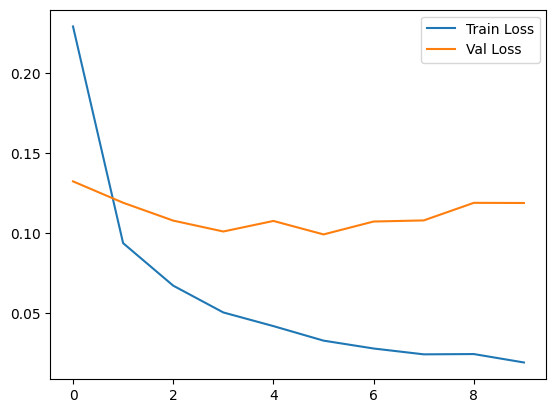

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# set seed for reproducibility
torch.manual_seed(19)

# import data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1037),(0.3081))]) # normalize with MNIST mean and standard dev values found online

# gets training and testing data
mnist_train = datasets.MNIST(root= 'data', train = True, download = True, transform=transform)
mnist_test = datasets.MNIST(root= 'data', train = False, download = True, transform=transform)

# train_dataset, val_dataset = random_split(train_dataset, [train_size, validation_size])
mnist_train, mnist_val = random_split(mnist_train,[55000,5000])

val_loader = DataLoader(mnist_val, batch_size= 50, shuffle= False)
train_loader = DataLoader(mnist_train, batch_size= 50, shuffle= True)
test_loader = DataLoader(mnist_test, batch_size= 50, shuffle= False)

#making the model
class NeuralNetwork(nn.Module):
    def __init__ (self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(784,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,10)
        )

    def forward(self,x):
        x = x.view(-1, 784) # Flatten
        return self.layers(x)

#training the model
'''
for images, labels in train_loader
clear past gradients
foward pass
compute losses
backpropagation
update the weights
'''

def train(neural_network, criterion, optimizer, num_epochs, train_losses, val_losses, test_losses):
    for epoch in range(num_epochs):

        neural_network.train() # sets into test mode

        # training set -----------------------------------------------------------------------------
        
        total_train_loss = 0
        correct_train = 0

        for images, labels in train_loader:
            optimizer.zero_grad() # clears past gradients
            output = neural_network(images) # forward pass
            loss_train = criterion(output, labels) # compute losses
            loss_train.backward() # backpropagation
            optimizer.step() # updates the weights
            total_train_loss += loss_train.item()

            #computes each prediction, and then counts how many instances it got right
            pred = output.argmax(dim=1, keepdim=True)
            correct_train += pred.eq(labels.view_as(pred)).sum().item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses[epoch] = avg_train_loss

        # validation set ---------------------------------------------------------------------------

        neural_network.eval() # sets into eval mode

        total_val_loss = 0
        correct_val = 0

        with torch.no_grad():
            for images, labels in val_loader:
                output = neural_network(images)
                loss_val = criterion(output, labels)
                total_val_loss += loss_val.item()

                #computes each prediction, and then counts how many instances it got right
                pred = output.argmax(dim=1, keepdim=True)
                correct_val += pred.eq(labels.view_as(pred)).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses[epoch] = avg_val_loss

        # print out training and validation losses & accuracy at each epoch
        print(f"Epoch {epoch+1}/{num_epochs} "
              f"Train Loss: {avg_train_loss:.5f} "
              f"Train Accuracy: {correct_train / len(train_loader.dataset) * 100:.3f}% "
              f"Validation Loss: {avg_val_loss:.5f} "
              f"Validation Accuracy: {correct_val / len(val_loader.dataset) * 100:.3f}%")
        
    #testing set--------------------------------------------------------------------------------
    neural_network.eval()
    total_test_loss = 0
    correct_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            output = neural_network(images)
            test_loss = criterion(output, labels)
            total_test_loss += test_loss.item()

            #computes each prediction, and then counts how many instances it got right
            pred = output.argmax(dim=1, keepdim=True)
            correct_test += pred.eq(labels.view_as(pred)).sum().item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses[epoch] = avg_test_loss

    #print out accuracies at the end
    print(f"Testing Accuracy: {correct_test / len(test_loader.dataset) * 100:.3f}% "
          f"Test Loss: {avg_test_loss:.5f}")
    
#declare model
learning_rate = 0.001
num_epochs = 10
neural_network = NeuralNetwork()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neural_network.parameters(), learning_rate)


#initialize error counters for losses and plot over time
train_losses = np.zeros(num_epochs)
val_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

#train model
train(neural_network, criterion, optimizer, num_epochs, train_losses, val_losses, test_losses)

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.show()